Importing dependencies

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

# Make pandas display numbers nicely
pd.options.display.float_format = '{:,.2f}'.format

Loading the data and initial checks

In [10]:
import pandas as pd

# Load the main transaction data file
try:
    df = pd.read_csv("../data/raw/dataset.csv")
except FileNotFoundError:
    print("Please make sure 'dataset.csv' is in your project directory.")
    exit()

# 1. Inspect the first few rows
print("--- 1. Head of the Data ---")
print(df.head())
print(f"Dataset shape: {df.shape[0]:,}rows * {df.columns.size} columns")

# 2. Check the overall structure (rows, columns, data types, missing values)
print("\n--- 2. Data Info ---")
df.info()

# 3. Check for the number of unique customers
# This is a key metric to understand the scale of the customer base.
num_customers = df['CustomerId'].nunique()
print(f"\nTotal number of unique customers: {num_customers}")

--- 1. Head of the Data ---
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId    Am

Converting TransactionStartTime to datetime and creating local time version for easier analysis

In [11]:
df["TransactionStartTime"]= pd.to_datetime(df["TransactionStartTime"], utc=True)
df["TransactionStartTime_local"]=df["TransactionStartTime"].dt.tz_convert("Africa/Kampala")
df[["TransactionStartTime","TransactionStartTime_local"]].head()

,TransactionStartTime,TransactionStartTime_local
0,2018-11-15 02:18:49+00:00,2018-11-15 05:18:49+03:00
1,2018-11-15 02:19:08+00:00,2018-11-15 05:19:08+03:00
2,2018-11-15 02:44:21+00:00,2018-11-15 05:44:21+03:00
3,2018-11-15 03:32:55+00:00,2018-11-15 06:32:55+03:00
4,2018-11-15 03:34:21+00:00,2018-11-15 06:34:21+03:00


Statistical Summary

In [12]:
df.describe(include="all")

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TransactionStartTime_local
count,95662,95662,95662,95662,95662,95662,"95,662.00",95662,95662,95662,95662,"95,662.00","95,662.00",95662,"95,662.00","95,662.00",95662
unique,95662,94809,3633,3627,3742,1,NaN,6,23,9,4,NaN,NaN,NaN,NaN,NaN,NaN
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_3,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,28,30893,32630,4091,95662,NaN,38189,32635,45405,56935,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,256.00,NaN,NaN,NaN,NaN,"6,717.85","9,900.58",2019-01-02 01:15:52.886433536+00:00,2.26,0.00,2019-01-02 04:15:52.886433536+03:00
min,NaN,NaN,NaN,NaN,NaN,NaN,256.00,NaN,NaN,NaN,NaN,"-1,000,000.00",2.00,2018-11-15 02:18:49+00:00,0.00,0.00,2018-11-15 05:18:49+03:00
25%,NaN,NaN,NaN,NaN,NaN,NaN,256.00,NaN,NaN,NaN,NaN,-50.00,275.00,2018-12-12 09:47:57.750000128+00:00,2.00,0.00,2018-12-12 12:47:57.750000128+03:00
50%,NaN,NaN,NaN,NaN,NaN,NaN,256.00,NaN,NaN,NaN,NaN,"1,000.00","1,000.00",2018-12-31 17:20:45+00:00,2.00,0.00,2018-12-31 20:20:45+03:00
75%,NaN,NaN,NaN,NaN,NaN,NaN,256.00,NaN,NaN,NaN,NaN,"2,800.00","5,000.00",2019-01-25 10:54:47.500000+00:00,2.00,0.00,2019-01-25 13:54:47.500000+03:00
max,NaN,NaN,NaN,NaN,NaN,NaN,256.00,NaN,NaN,NaN,NaN,"9,880,000.00","9,880,000.00",2019-02-13 10:01:28+00:00,4.00,1.00,2019-02-13 13:01:28+03:00


Checking Missing Values

In [13]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
TransactionId                 0
BatchId                       0
AccountId                     0
SubscriptionId                0
CustomerId                    0
CurrencyCode                  0
CountryCode                   0
ProviderId                    0
ProductId                     0
ProductCategory               0
ChannelId                     0
Amount                        0
Value                         0
TransactionStartTime          0
PricingStrategy               0
FraudResult                   0
TransactionStartTime_local    0
dtype: int64


Unique Customers and time range

In [14]:
print(f"Number of unique customers (CustomerId) : {df['CustomerId'].nunique():,}")
print(f"Date range: {df['TransactionStartTime_local'].dt.date.min()} to {df['TransactionStartTime_local'].dt.date.max()}")
print(f"That is {(df['TransactionStartTime_local'].dt.date.max() - df['TransactionStartTime_local'].dt.date.min()).days} days of data")


Number of unique customers (CustomerId) : 3,742
Date range: 2018-11-15 to 2019-02-13
That is 90 days of data


Amount vs value explanation

In [15]:
print("sample of negative Amounts (refunds/credits):")
df[df["Amount"]<0].head(10)

sample of negative Amounts (refunds/credits):


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TransactionStartTime_local
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.00,20,2018-11-15 02:19:08+00:00,2,0,2018-11-15 05:19:08+03:00
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.00,644,2018-11-15 03:34:21+00:00,2,0,2018-11-15 06:34:21+03:00
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.00,500,2018-11-15 03:45:13+00:00,2,0,2018-11-15 06:45:13+03:00
11,TransactionId_33857,BatchId_126394,AccountId_4841,SubscriptionId_3829,CustomerId_3052,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-40.00,40,2018-11-15 04:32:42+00:00,2,0,2018-11-15 07:32:42+03:00
18,TransactionId_64044,BatchId_117733,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-10.00,10,2018-11-15 04:54:18+00:00,2,0,2018-11-15 07:54:18+03:00
20,TransactionId_94363,BatchId_94932,AccountId_4841,SubscriptionId_3829,CustomerId_3507,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-25.00,25,2018-11-15 04:57:00+00:00,2,0,2018-11-15 07:57:00+03:00
22,TransactionId_138139,BatchId_8334,AccountId_4841,SubscriptionId_3829,CustomerId_3507,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-25.00,25,2018-11-15 04:59:41+00:00,2,0,2018-11-15 07:59:41+03:00
25,TransactionId_74649,BatchId_100266,AccountId_4841,SubscriptionId_3829,CustomerId_2728,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-10.00,10,2018-11-15 05:06:39+00:00,2,0,2018-11-15 08:06:39+03:00
28,TransactionId_136360,BatchId_48611,AccountId_4841,SubscriptionId_3829,CustomerId_1995,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-70.00,70,2018-11-15 05:38:35+00:00,2,0,2018-11-15 08:38:35+03:00
31,TransactionId_46482,BatchId_10454,AccountId_4841,SubscriptionId_3829,CustomerId_3890,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-100.00,100,2018-11-15 05:44:06+00:00,2,0,2018-11-15 08:44:06+03:00


Distribution of Amount and Value

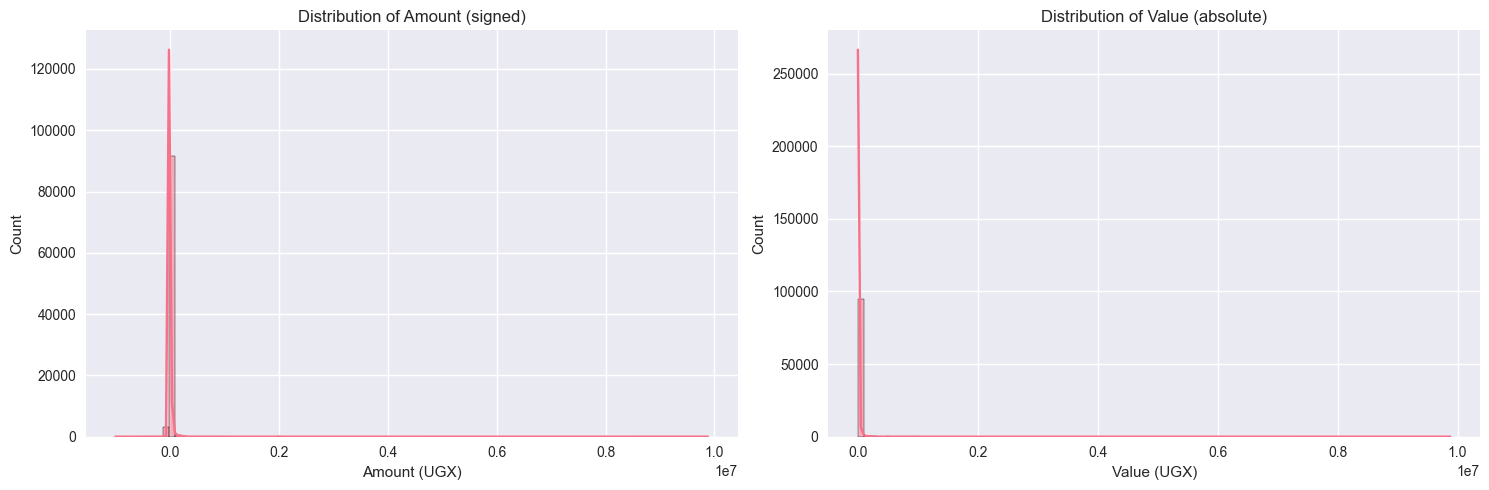

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.histplot(df["Amount"], bins=100, ax=ax[0], kde=True)
ax[0].set_title("Distribution of Amount (signed)")
ax[0].set_xlabel("Amount (UGX)")

sns.histplot(df["Value"], bins=100, ax=ax[1], kde=True)
ax[1].set_title("Distribution of Value (absolute)")
ax[1].set_xlabel("Value (UGX)")

plt.tight_layout()
plt.show()


Top Product Categories

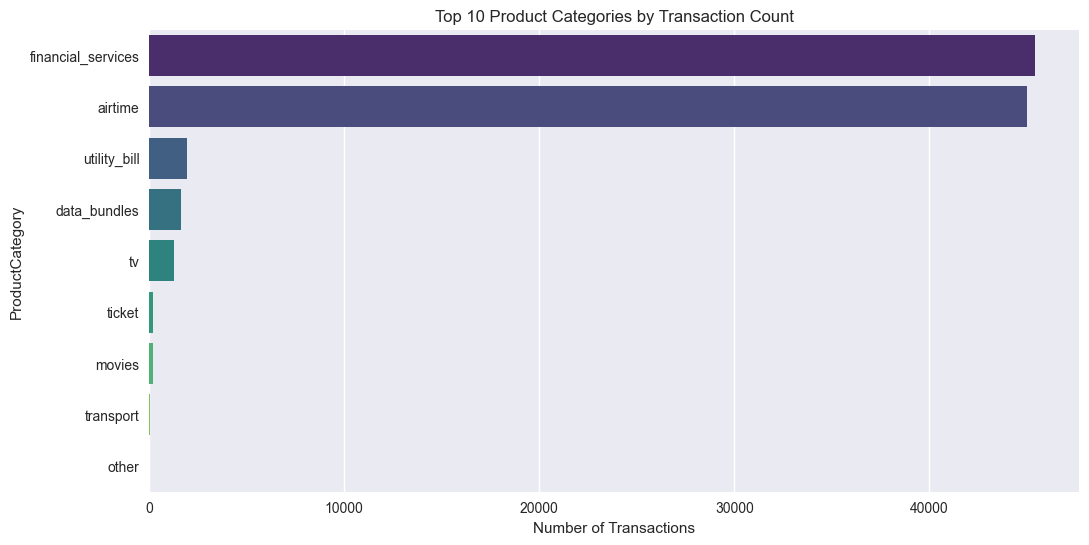

In [17]:
plt.figure(figsize=(12, 6))
top_cat = df["ProductCategory"].value_counts().head(10)
sns.barplot(x=top_cat.values, y=top_cat.index, palette="viridis")
plt.title("Top 10 Product Categories by Transaction Count")
plt.xlabel("Number of Transactions")
plt.show()

Transactions over Time

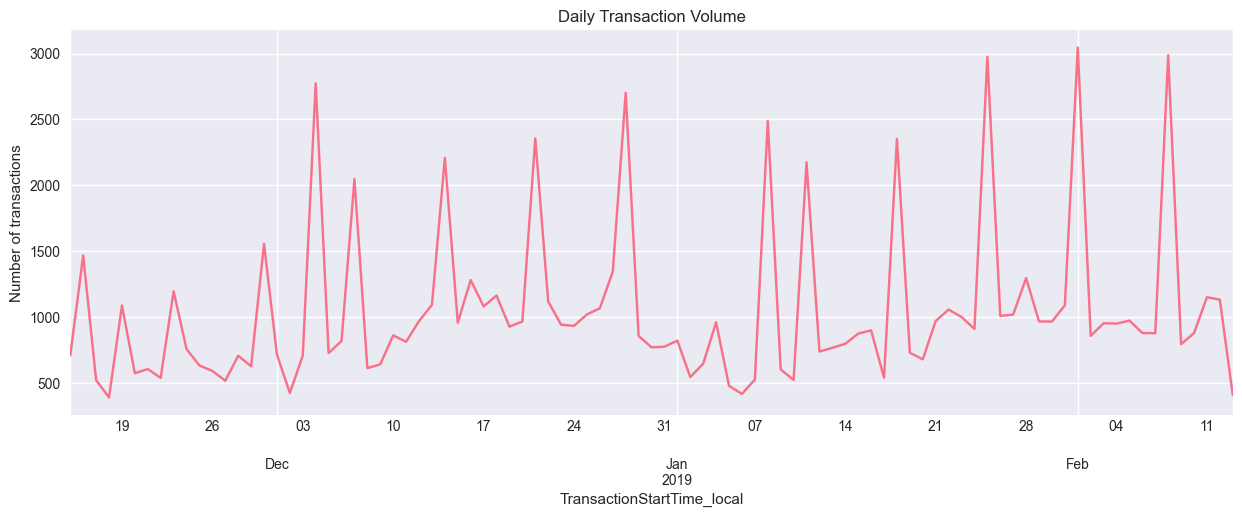

In [18]:
daily_transactions = df.set_index("TransactionStartTime_local").resample("D")["TransactionId"].count()

plt.figure(figsize=(15, 5))
daily_transactions.plot()
plt.title("Daily Transaction Volume")
plt.ylabel("Number of transactions")
plt.show()

RFM sneak peek

In [19]:
snapshot_date = df["TransactionStartTime_local"].max() + pd.Timedelta(days=1)

rfm = df.groupby("CustomerId").agg({
    "TransactionStartTime_local": lambda x: (snapshot_date - x.max()).days,   # Recency
    "TransactionId": "count",                                               # Frequency
    "Amount": "sum"                                                         # Monetary (we'll improve this later)
}).rename(columns={
    "TransactionStartTime_local": "Recency",
    "TransactionId": "Frequency",
    "Amount": "Monetary"
})

rfm.head(10)

,Recency,Frequency,Monetary
CustomerId,,,
CustomerId_1,84,1,"-10,000.00"
CustomerId_10,84,1,"-10,000.00"
CustomerId_1001,90,5,"20,000.00"
CustomerId_1002,26,11,"4,225.00"
CustomerId_1003,12,6,"20,000.00"
CustomerId_1004,53,1,"2,000.00"
CustomerId_1005,47,9,"48,800.00"
CustomerId_1006,65,1,"1,000.00"
CustomerId_1007,82,1,"28,000.00"


RFM distributions

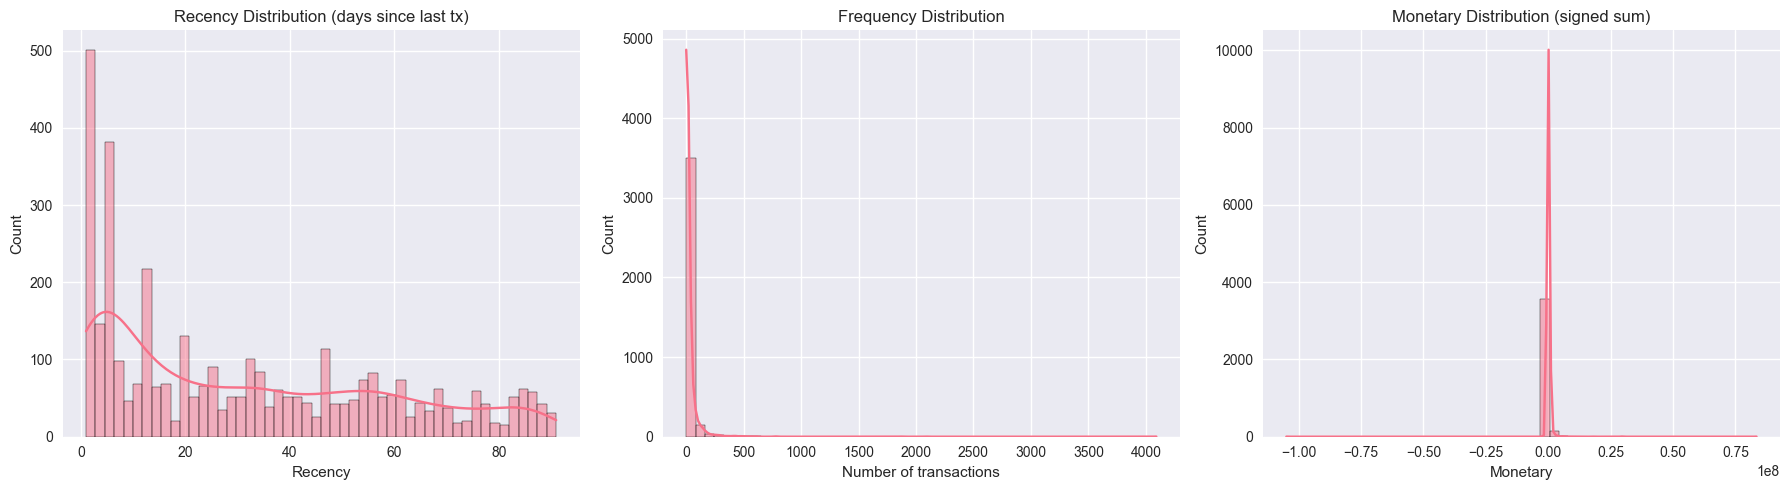

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm["Recency"], bins=50, ax=ax[0], kde=True)
ax[0].set_title("Recency Distribution (days since last tx)")

sns.histplot(rfm["Frequency"], bins=50, ax=ax[1], kde=True)
ax[1].set_title("Frequency Distribution")
ax[1].set_xlabel("Number of transactions")

sns.histplot(rfm["Monetary"], bins=50, ax=ax[2], kde=True)
ax[2].set_title("Monetary Distribution (signed sum)")

plt.tight_layout()
plt.show()

## Top 5 EDA Insights

1. **Very clean dataset** – No missing values at all across 95k+ transactions and 3,740 unique customers.

2. **Highly skewed transaction amounts** – Most transactions are small (airtime & data bundles), but there are occasional very large utility bill payments (> 1M UGX). This will require careful scaling or WoE binning later.

3. **Dominant product categories** – "airtime" and "financial_services" make up the vast majority of transactions. "utility_bill", "data_bundles", and "tv" are distant followers.

4. **Clear refund/credit pattern** – Negative Amount values with corresponding positive Value are refunds or reversed transactions. Almost every customer has a small negative "financial_services" transaction right after a purchase – this looks like a platform fee that is immediately refunded or adjusted.

5. **Strong RFM variation** – 
   - Recency ranges from 0 to ~90 days
   - Frequency ranges from 1 to >1,000 transactions per customer
   - This gives us excellent spread to create meaningful customer segments and a solid proxy target in Task 4.

Testing data_processing.py

In [11]:
import sys
import os

# Add the project root to Python path
sys.path.append(os.path.abspath(".."))

# Now this will work
from src.data_processing import build_processing_pipeline

In [1]:
import sys
import os
sys.path.append("..")   # add project root

from src.data_processing import build_processing_pipeline
import pandas as pd

df_raw = pd.read_csv("../data/raw/dataset.csv")   # make sure the name is data.csv (you wrote dataset.csv before)

pipeline = build_processing_pipeline()
processed = pipeline(df_raw)

print("Shape:", processed.shape)
display(processed.head())

processed.to_csv("../data/processed/processed_features.csv", index=False)
print("Saved to data/processed/processed_features.csv")

Shape: (3742, 26)


,CustomerId,total_amount,avg_amount,std_amount,transaction_count,total_value,avg_value,std_value,avg_hour,prop_weekend,...,most_frequent_ProductCategory_financial_services,most_frequent_ProductCategory_movies,most_frequent_ProductCategory_other,most_frequent_ProductCategory_ticket,most_frequent_ProductCategory_transport,most_frequent_ProductCategory_tv,most_frequent_ProductCategory_utility_bill,most_frequent_ChannelId_ChannelId_2,most_frequent_ChannelId_ChannelId_3,most_frequent_ChannelId_ChannelId_5
0,CustomerId_1,-0.066891,-0.153364,-0.140432,-0.253459,-0.089524,-0.052297,-0.131508,1.052595,-0.645213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,CustomerId_10,-0.066891,-0.153364,-0.140432,-0.253459,-0.089524,-0.052297,-0.131508,1.052595,-0.645213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,CustomerId_1001,-0.055849,-0.069870,-0.072731,-0.212186,-0.082011,-0.075710,-0.089197,-0.869703,-0.645213,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,CustomerId_1002,-0.061655,-0.091435,-0.134647,-0.150278,-0.091448,-0.109431,-0.126154,0.455873,-0.052250,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,CustomerId_1003,-0.055849,-0.073846,-0.078186,-0.201868,-0.081422,-0.080169,-0.090795,0.661884,-0.645213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Saved to data/processed/processed_features.csv
